# Importing the dataset

In [1]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
new_X_train = X_train.astype('float32')
new_X_test = X_test.astype('float32')
new_X_test /= 255
new_X_train /= 255
new_Y_train = np_utils.to_categorical(Y_train)
new_Y_test = np_utils.to_categorical(Y_test)

# First model

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten, Input, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D, regularizers
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [17]:
model = Sequential()
ip = Input(shape=(32, 32, 3))
model.add(Conv2D(64, (3,3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # 32X32, (3,3) amount of increment in X and Y
model.add(Conv2D(64, (3,3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # 32X32, (3,3) amount of increment in X and Y
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # 32X32, (3,3) amount of increment in X and Y
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256, (3,3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # 32X32, (3,3) amount of increment in X and Y
model.add(Conv2D(256, (3,3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # 32X32, (3,3) amount of increment in X and Y
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)) )
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)        

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset,[train_size, val_size],generator=torch.manual_seed(random_seed))
len(train_ds), len(val_ds)

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [9]:
callbacks_list = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                  ModelCheckpoint(filepath='my_model.h5',
                                  monitor='val_loss',
                                  save_best_only=True),
                  ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
                  ] 

In [20]:
history = model.fit(new_X_train, new_Y_train,
              batch_size=32,
              epochs=20,
              callbacks=callbacks_list,
              validation_split=0.1,
              verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 174s 4ms/step - loss: 1.4253 - accuracy: 0.4789 - val_loss: 1.4308 - val_accuracy: 0.4880
Epoch 2/20
45000/45000 [==============================] - 174s 4ms/step - loss: 1.1626 - accuracy: 0.5849 - val_loss: 1.0090 - val_accuracy: 0.6434
Epoch 3/20
45000/45000 [==============================] - 173s 4ms/step - loss: 0.9872 - accuracy: 0.6502 - val_loss: 0.9936 - val_accuracy: 0.6434
Epoch 4/20
45000/45000 [==============================] - 173s 4ms/step - loss: 0.8721 - accuracy: 0.6916 - val_loss: 1.5429 - val_accuracy: 0.5412
Epoch 5/20
45000/45000 [==============================] - 177s 4ms/step - loss: 0.7787 - accuracy: 0.7277 - val_loss: 1.6986 - val_accuracy: 0.4842
Epoch 6/20
45000/45000 [==============================] - 179s 4ms/step - loss: 0.7059 - accuracy: 0.7521 - val_loss: 0.6741 - val_accuracy: 0.7654
Epoch 7/20
45000/45000 [==============================] - 177s 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import OrderedDict

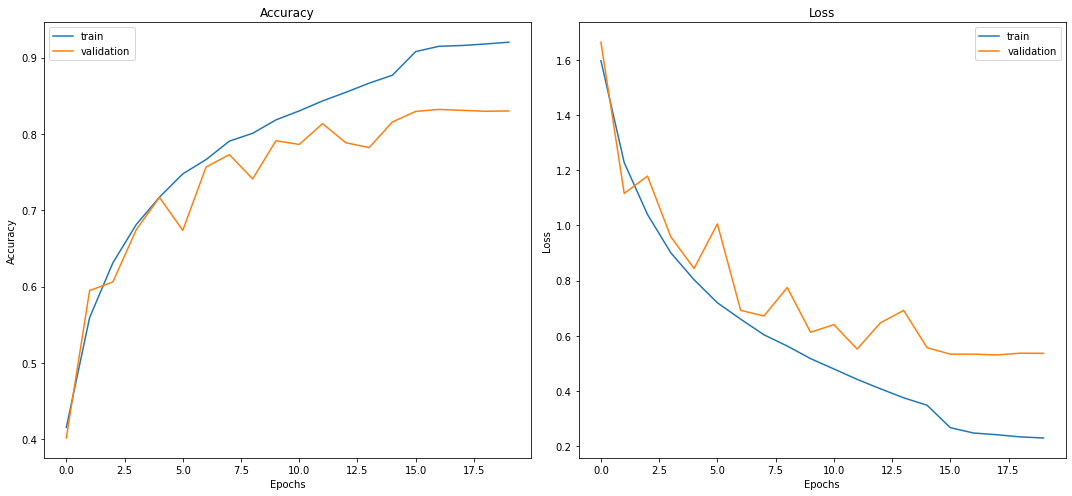

In [76]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc1s.jpg')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss1s.jpg')

plt.tight_layout()
plt.show()

In [77]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
preds = np.argmax(model.predict(new_X_test), axis = 1)
y_orig = np.argmax(new_Y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

Normalized confusion matrix


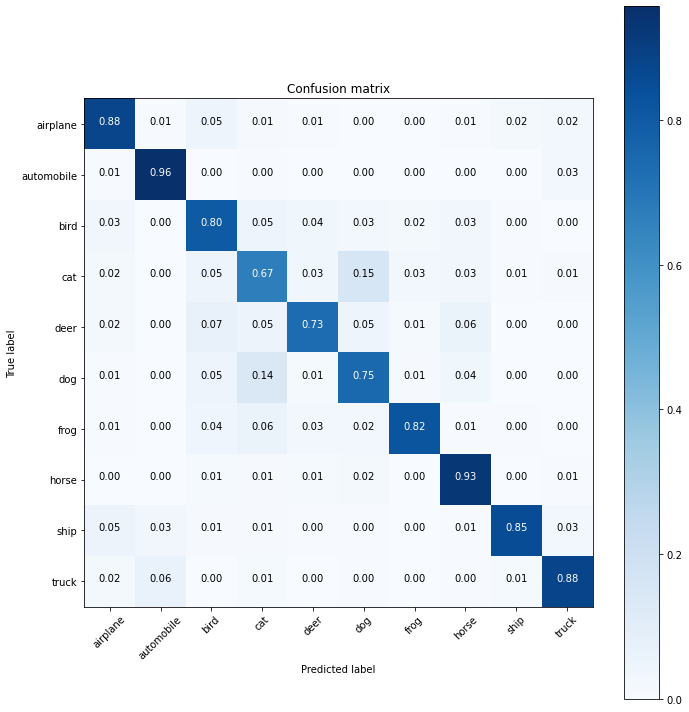

In [80]:
labels1 = {"airplane": 0 , "automobile": 1, "bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6, "horse": 7, "ship": 8, "truck": 9}
keys = OrderedDict(sorted(labels1.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, keys, normalize=True)
plt.savefig('cmsc.jpg')

In [21]:
import h5py
model.save('trained_model1st.h5')

# ResNet50 model

In [26]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
modelRes = ResNet50V2(include_top=False, input_shape=(32,32,3))

In [27]:
import tensorflow as tf

In [28]:
for layer in modelRes.layers:
    layer.trainable=False

In [29]:
output=modelRes.layers[-1].output
model_final=tf.keras.layers.Flatten()(output)
model_final=tf.keras.layers.Dense(512,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(10,activation='softmax')(model_final)

In [30]:
modelRes=tf.keras.models.Model(modelRes.input,model_final)

In [31]:
modelRes.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
hist = modelRes.fit(new_X_train, new_Y_train,
              batch_size=32,
              epochs=10,
              callbacks=callbacks_list,
              validation_split=0.1,
              verbose=1 )

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 108s 2ms/sample - loss: 2.0297 - accuracy: 0.2681 - val_loss: 2.2243 - val_accuracy: 0.1758
Epoch 2/10
45000/45000 [==============================] - 112s 2ms/sample - loss: 1.9049 - accuracy: 0.3191 - val_loss: 2.2082 - val_accuracy: 0.1760
Epoch 3/10
45000/45000 [==============================] - 111s 2ms/sample - loss: 1.8718 - accuracy: 0.3362 - val_loss: 2.2014 - val_accuracy: 0.1740
Epoch 4/10
45000/45000 [==============================] - 113s 3ms/sample - loss: 1.8470 - accuracy: 0.3433 - val_loss: 2.2186 - val_accuracy: 0.1748
Epoch 5/10
45000/45000 [==============================] - 112s 2ms/sample - loss: 1.8327 - accuracy: 0.3484 - val_loss: 2.2040 - val_accuracy: 0.1806
Epoch 6/10
45000/45000 [==============================] - 109s 2ms/sample - loss: 1.8177 - accuracy: 0.3546 - val_loss: 2.1877 - val_accuracy: 0.1856
Epoch 7/10
45000/45000 [===========================

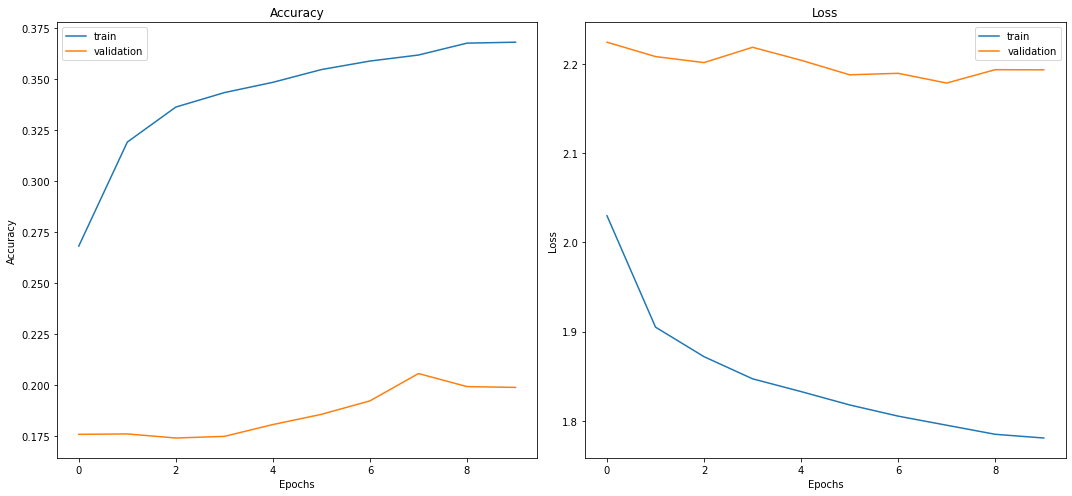

In [34]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc2n.jpg')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss2n.jpg')

plt.tight_layout()
plt.show()

Normalized confusion matrix


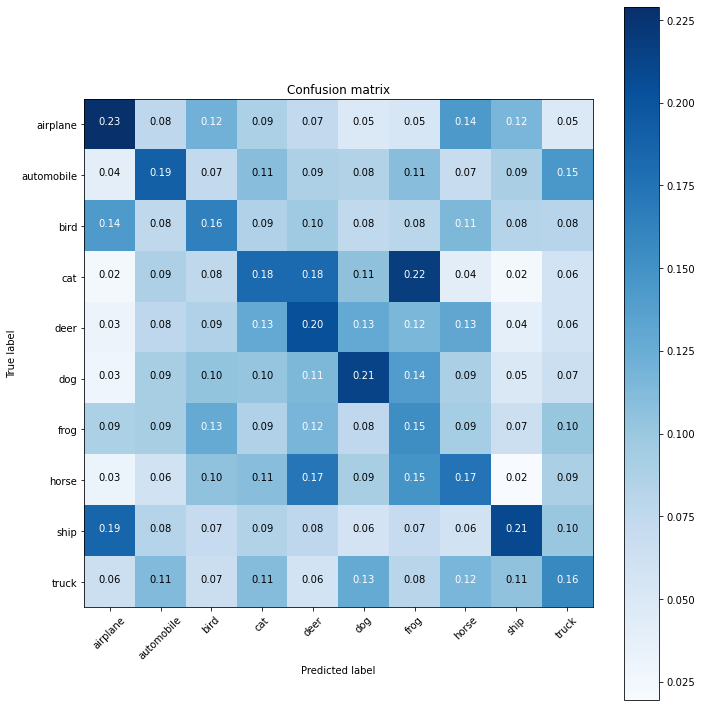

In [35]:
preds = np.argmax(modelRes.predict(new_X_test), axis = 1)
y_orig = np.argmax(new_Y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

labels1 = {"airplane": 0 , "automobile": 1, "bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6, "horse": 7, "ship": 8, "truck": 9}
keys = OrderedDict(sorted(labels1.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, keys, normalize=True)

In [31]:
import h5py
modelRes.save('trained_model2nd.h5')

# VGG16 model

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16
modelVGG = VGG16(include_top = False, input_shape =(32,32,3))

In [37]:
for layer in modelVGG.layers:
    layer.trainable=False

In [38]:
output=modelVGG.layers[-1].output
model_final=tf.keras.layers.Flatten()(output)
model_final=tf.keras.layers.Dense(512,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(10,activation='softmax')(model_final)

In [39]:
modelVGG=tf.keras.models.Model(modelVGG.input,model_final)

In [40]:
modelVGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
hist = modelVGG.fit(new_X_train, new_Y_train,
              batch_size=32,
              epochs=10,
              callbacks=callbacks_list,
              validation_split=0.1,
              verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 106s 2ms/sample - loss: 1.3462 - accuracy: 0.5261 - val_loss: 1.1681 - val_accuracy: 0.5908
Epoch 2/10
45000/45000 [==============================] - 111s 2ms/sample - loss: 1.1632 - accuracy: 0.5912 - val_loss: 1.1239 - val_accuracy: 0.6044
Epoch 3/10
45000/45000 [==============================] - 112s 2ms/sample - loss: 1.0827 - accuracy: 0.6196 - val_loss: 1.1136 - val_accuracy: 0.6092
Epoch 4/10
45000/45000 [==============================] - 113s 3ms/sample - loss: 1.0262 - accuracy: 0.6362 - val_loss: 1.0988 - val_accuracy: 0.6184
Epoch 5/10
45000/45000 [==============================] - 109s 2ms/sample - loss: 0.9743 - accuracy: 0.6570 - val_loss: 1.0899 - val_accuracy: 0.6194
Epoch 6/10
45000/45000 [==============================] - 106s 2ms/sample - loss: 0.9235 - accuracy: 0.6730 - val_loss: 1.1013 - val_accuracy: 0.6230
Epoch 7/10
45000/45000 [===========================

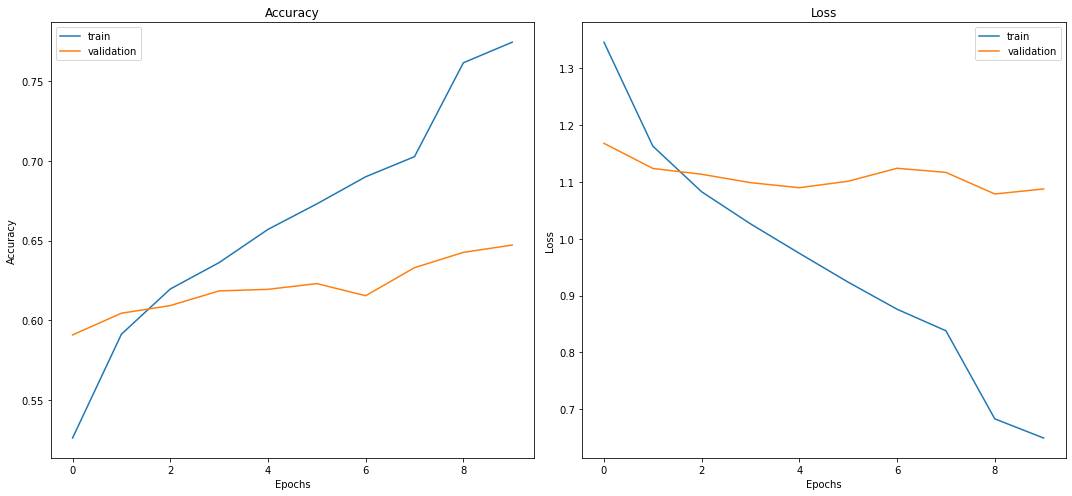

In [43]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc3r.jpg')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss3r.jpg')

plt.tight_layout()
plt.show()

Normalized confusion matrix


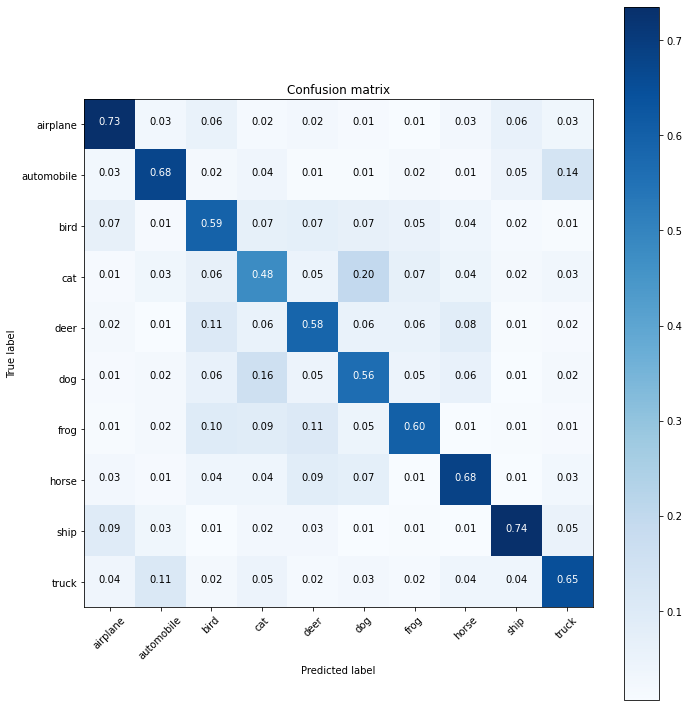

In [44]:
preds = np.argmax(modelVGG.predict(new_X_test), axis = 1)
y_orig = np.argmax(new_Y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

labels1 = {"airplane": 0 , "automobile": 1, "bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6, "horse": 7, "ship": 8, "truck": 9}
keys = OrderedDict(sorted(labels1.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, keys, normalize=True)

In [53]:
import h5py
modelVGG.save('trained_model3rd.h5')

# Driver function to check how each model responds to a user given image

In [69]:
from PIL import Image
import numpy as np 
from tensorflow.keras.models import load_model #load model from a file

#labels1 = {"airplane": 0 , "automobile": 1, "bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6, "horse": 7, "ship": 8, "truck": 9}
labels = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
model1 = load_model('trained_model1st.h5')

In [61]:
input_path = input('Enter image file path: ')
input_image = Image.open(input_path)
input_image = input_image.resize((32,32), resample=Image.LANCZOS)
image_array = np.array(input_image)
image_array = image_array.astype('float32')
image_array /= 255.0
image_array = image_array.reshape(1, 32, 32, 3)
answer = model1.predict(image_array)
input_image.show()
print("From 1st model")
print(labels[np.argmax(answer)])

Enter image file path: C:\Users\Thunder\Downloads\frog.jpg
From 1st model
frog


In [65]:
model2 = load_model('trained_model2nd.h5')

In [66]:
answer = model2.predict(image_array)
input_image.show()
print("From 2nd model")
print(labels[np.argmax(answer)])

From 2nd model
frog


In [67]:
model3 = load_model('trained_model3rd.h5')

In [68]:
answer = model3.predict(image_array)
input_image.show()

print("From 3rd model")
print(labels[np.argmax(answer)])

From 3rd model
frog


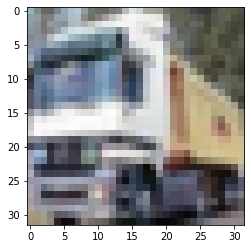

In [26]:
img = new_X_train[1]
plt.imshow(img)

In [54]:
model = Sequential()
ip = Input(shape=(32, 32, 3))
x = Conv2D(32, (3,3), activation='relu', padding='1')#, kernel_size=3)(ip)  # 32X32, (3,3) amount of increment in X and Y
x = MaxPooling2D(pool_size=(2,2))(x)
#x = Dropout(0.5)(x)
x = Conv2D(64, (3,3), activation='relu',padding='1')(x)  # 32X32, (3,3) amount of increment in X and Y
x = MaxPooling2D(pool_size=(2,2))(x)
#x = Dropout(0.5)(x)
x = Conv2D(128, (3,3), activation='relu', padding='1')(x)  # 32X32, (3,3) amount of increment in X and Y
x = MaxPooling2D(pool_size=(2,2))(x)
#x = Dropout(0.5)(x)
x = Conv2D(256, (3,3), activation='relu', padding='1')(x)  # 32X32, (3,3) amount of increment in X and Y
x = MaxPooling2D(pool_size=(2,2))(x)
#x = Dropout(0.5)(x)
x = Conv2D(512, (3,3), activation='relu', padding='1')(x)  # 32X32, (3,3) amount of increment in X and Y
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
op = Dense(10, activation='softmax',  kernel_constraint=maxnorm(3))(x)
model = Model(inputs=ip, outputs=op)
# model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))  # 32X32, (3,3) amount of increment in X and Y
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
# model.add(Conv2D(64, (3,3), activation='relu')
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
# model.add(Conv2D(128, (3,3), activation='relu')
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)) )

# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

ValueError: The `padding` argument must be one of "valid", "same" (or "causal" for Conv1D). Received: 1

In [27]:
from keras.optimizers import Adam, regularizers

ModuleNotFoundError: No module named 'keras.optimizers.layers'; 'keras.optimizers' is not a package

In [13]:
hist = model.fit(new_X_train, new_Y_train, epochs=10, batch_size=32, callbacks=callbacks_list,
              validation_split=0.1, verbose=1)

Train on 45000 samples, validate on 5000 samples


AttributeError: 'Sequential' object has no attribute '_in_multi_worker_mode'

In [32]:
mod = getModel()

NameError: name 'l2_labmda' is not defined

In [31]:
def getModel():

    optim = Adam(decay=0)

    model =Sequential()
    ip = Input(shape=(32, 32, 3))
    model.add(Conv2D(32,(3,3),activation = 'relu',input_shape =[32,32,3],kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda),data_format='channels_last',name='1st'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same',name = 'pool1'))
    model.add(Dropout(0.2,name='2'))


    model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda),name='3'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same',name = 'pool2'))
    model.add(Dropout(0.2,name='4'))

    model.add(Conv2D(64,(5,5),activation = 'relu',kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda),name='5'))

    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same',name = 'pool3'))

    model.add(Dropout(0.2, name='6'))

# =============================================================================
    model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda),name='7'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same',name = 'pool5'))
    model.add(Dropout(0.2,name='8'))
#    
# =============================================================================
    model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda),name='9'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same',name = 'pool6'))

    model.add(Dropout(0.2))


    model.add(Flatten(name='12'))

    model.add(Dense(512,activation='relu',kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda), name='13'))
    model.add(Dropout(0.2,name='14'))


    model.add(Dense(512,activation='relu',kernel_initializer='he_uniform',
                                kernel_regularizer=regularizers.l2(l2_labmda),name='15'))
    model.add(Dropout(0.2,name='16'))

    model.add(Dense(40,activation='softmax',kernel_initializer='glorot_uniform    ',
                                kernel_regularizer=regularizers.l2(l2_labmda),name='17'))

    model.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['accuracy'])
    print(model.summary())

    return model

In [19]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 